# Rollarcoaster Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

for dirname, _, filenames in os.walk('../data/raw'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/raw\.gitkeep
../data/raw\coaster_db.csv


In [2]:
df = pd.read_csv('../data/raw/coaster_db.csv')

## 1. Understanding the Data 
### Basic data inspection to understand the structure and completeness of the dataset
- Dataframe ```shape```
- Dataframe ```info```
- ```head``` and ```tail```
- ```dtypes```
- ```describe``` 

In [3]:
print('Data Shape', df.shape)

Data Shape (1087, 56)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [5]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [6]:
df.tail()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,...,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [7]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [8]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [9]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## 2. Data Preperation 
### Sorting and highlighting data important dataset
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [10]:
df['Cost']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1082    NaN
1083    NaN
1084    NaN
1085    NaN
1086    NaN
Name: Cost, Length: 1087, dtype: object

In [11]:
df = df[['coaster_name', 
 # 'Length', 'Speed', 
 'Location', 'Status', 
 # 'Opening date',
 # 'Type', 
 'Manufacturer', 
 # 'Height restriction', 'Model', 'Height',
 # 'Inversions', 'Lift/launch system', 
 'Cost', 
 # 'Trains', 'Park section',
 # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
 # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
 # 'Track layout', 'Fastrack available', 'Soft opening date.1',
 # 'Closing date', 'Opened', 'Replaced by', 'Website',
 # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
 # 'Single rider line available', 'Restraint Style',
 # 'Flash Pass available', 
 'Acceleration', 
 # 'Restraints', 'Name',
 'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 
 # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
 'speed_mph', 
 # 'height_value', 'height_unit', 
 'height_ft', 'Inversions_clean', 'Gforce_clean']].copy()

In [12]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [13]:
# Rename our columns
df = df.rename(columns={'coaster_name':'Coaster_Name', 
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date_Clean', 
                   'speed_mph':'Speed_MPH', 
                   'height_ft':'Height_ft', 
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [14]:
df.isna().sum()

Coaster_Name             0
Location                 0
Status                 213
Manufacturer            59
Cost                   705
Acceleration          1027
Year_Introduced          0
latitude               275
longitude              275
Type_Main                0
Opening_Date_Clean     250
Speed_MPH              150
Height_ft              916
Inversions               0
Gforce                 725
dtype: int64

In [15]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Cost,Acceleration,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversions,Gforce


In [16]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Cost,Acceleration,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,"$176,000 CDN",NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,"$140,000",NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,$2.7M est.,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [17]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Cost,Acceleration,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,"$176,000 CDN",NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,"$176,000 CDN",NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [18]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Cost',
       'Acceleration', 'Year_Introduced', 'latitude', 'longitude', 'Type_Main',
       'Opening_Date_Clean', 'Speed_MPH', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [19]:
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date_Clean'])] \
    .reset_index(drop=True).copy()

## 3. Feature Understanding
### Analyze the distribution of individual variables to identify outliers and skewness. Also called the <b>Univariate Analysis</b>
- Plotting Feature Distributions
    * Histogram
    * KDE
    * Boxplot


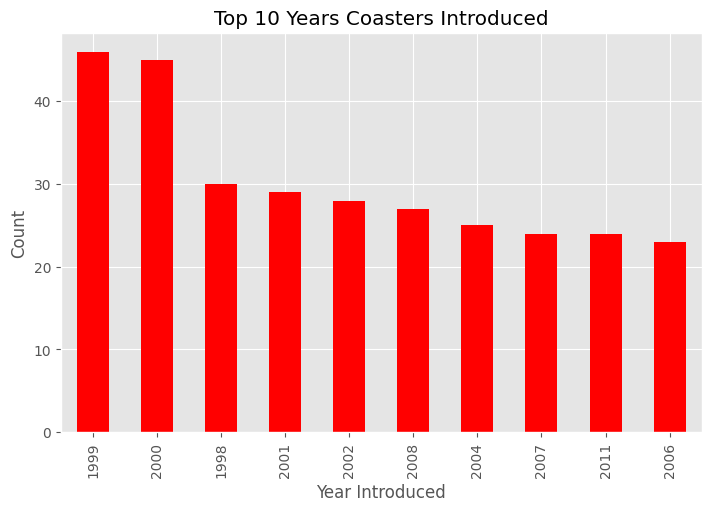

In [20]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced', color='red')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

plt.savefig('../reports/figures/Top_10_Years_Coasters_Introduced.pdf', format='pdf')

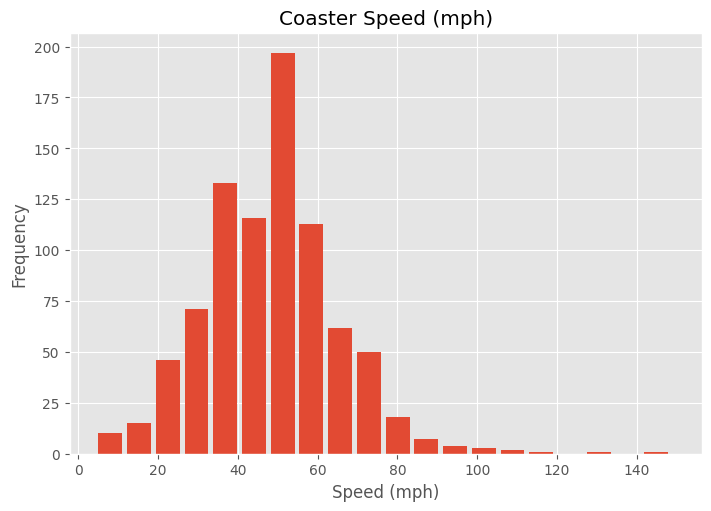

In [21]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

ax = df['Speed_MPH'].plot(kind='hist',
                          bins=20,
                          width=6,
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

plt.savefig('../reports/figures/Coaster_Speed.pdf', format='pdf')

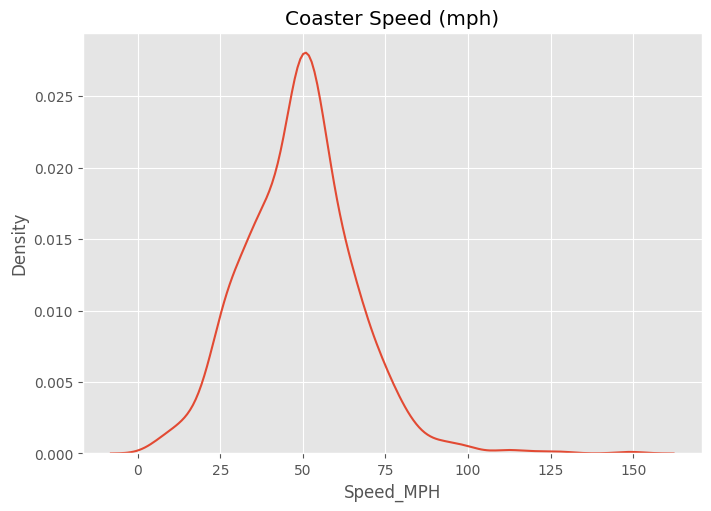

In [22]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

ax = sns.kdeplot(data=df['Speed_MPH']).set_title('Coaster Speed (mph)')

plt.savefig('../reports/figures/Coaster_Speed_KDE.pdf', format='pdf')

In [23]:
print(df['Type_Main'].value_counts())

Type_Main
Steel    728
Wood     191
Other     71
Name: count, dtype: int64


## 4. Feature Relationships
### Explore relationships between features to provide additional information. Also called the <b>Multivariate Analysis</b>
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons


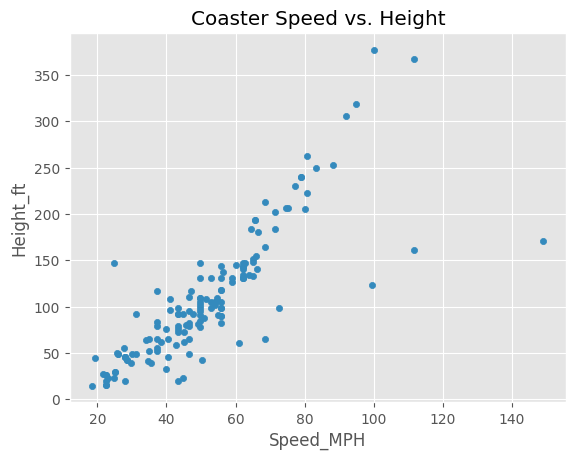

In [24]:
df.plot(kind='scatter',
        x='Speed_MPH',
        y='Height_ft',
        title='Coaster Speed vs. Height')


plt.savefig('../reports/figures/Coaster_Speed_vs_Height.pdf', format='pdf')

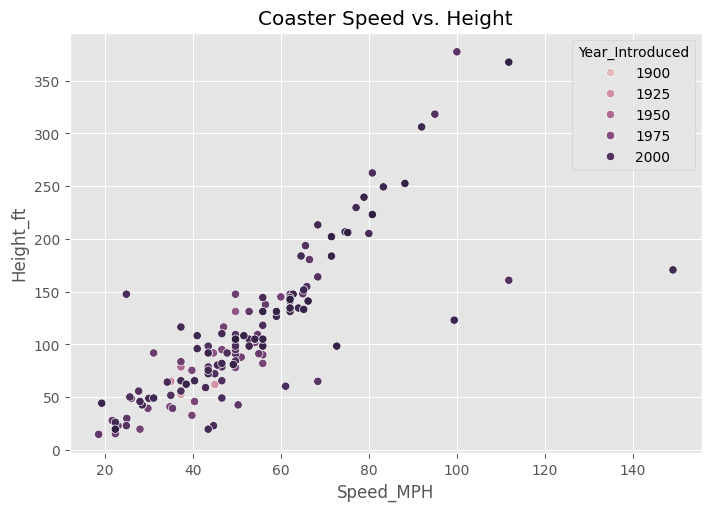

In [25]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

ax = sns.scatterplot(x='Speed_MPH',
                     y='Height_ft', 
                     hue='Year_Introduced',
                     data=df)
ax.set_title('Coaster Speed vs. Height')

plt.savefig('../reports/figures/Coaster_Speed_vs_Height2.pdf', format='pdf')

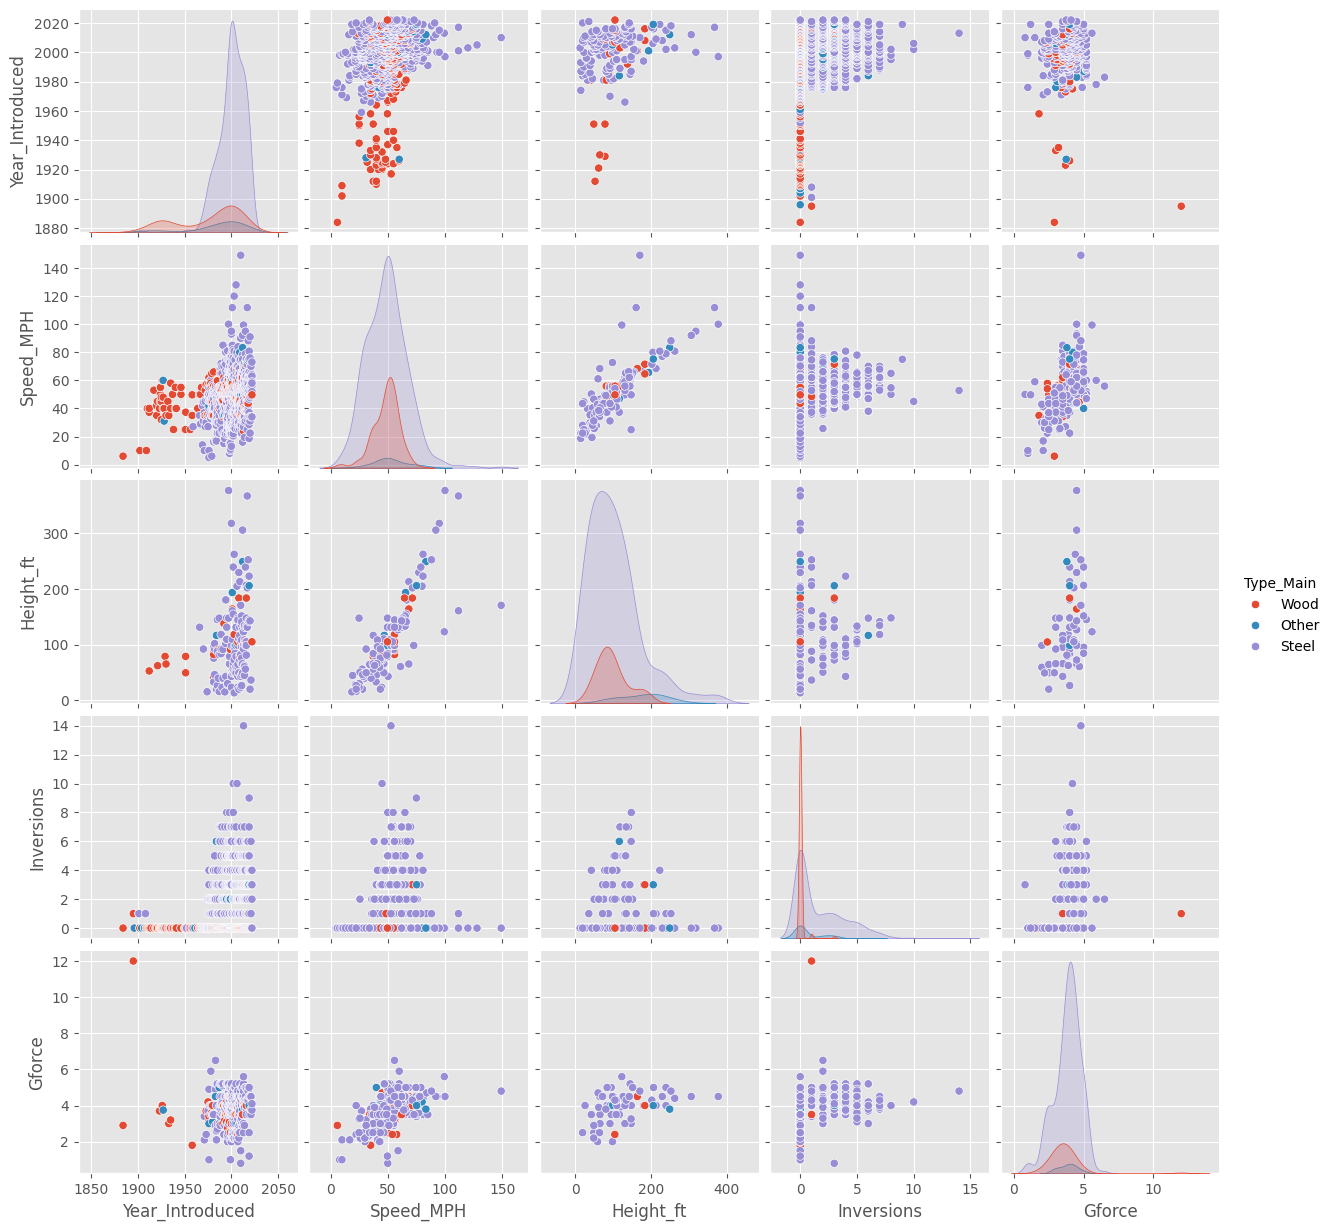

In [26]:
ax = sns.pairplot(df, 
                  vars=['Year_Introduced', 'Speed_MPH',
                  'Height_ft', 'Inversions', 'Gforce'],
                  hue='Type_Main')

plt.savefig('../reports/figures/Coaster_Pairplot_Relationship.pdf', format='pdf')

In [27]:
df_corr = df[['Year_Introduced', 'Speed_MPH',
                  'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_MPH,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_MPH,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


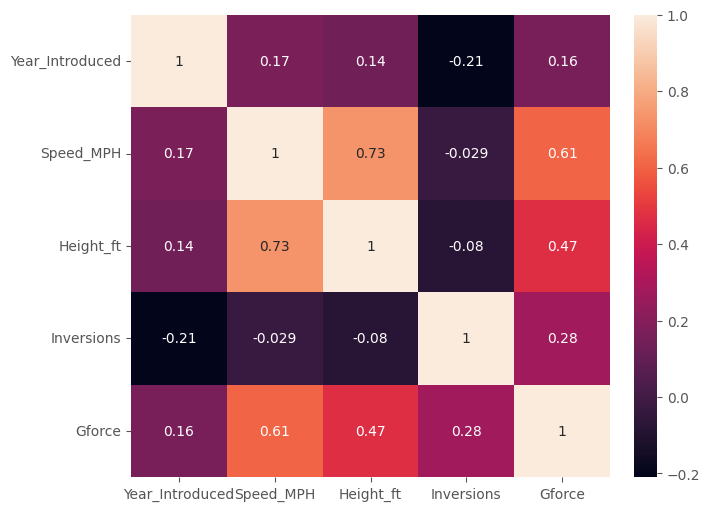

In [28]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)

ax = sns.heatmap(df_corr, annot=True)

plt.savefig('../reports/figures/Coaster_Heatmap_Relationship.pdf', format='pdf')

## Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic

### Question 1: What are the locations with the fastest roller coasters (minimum of 10)?

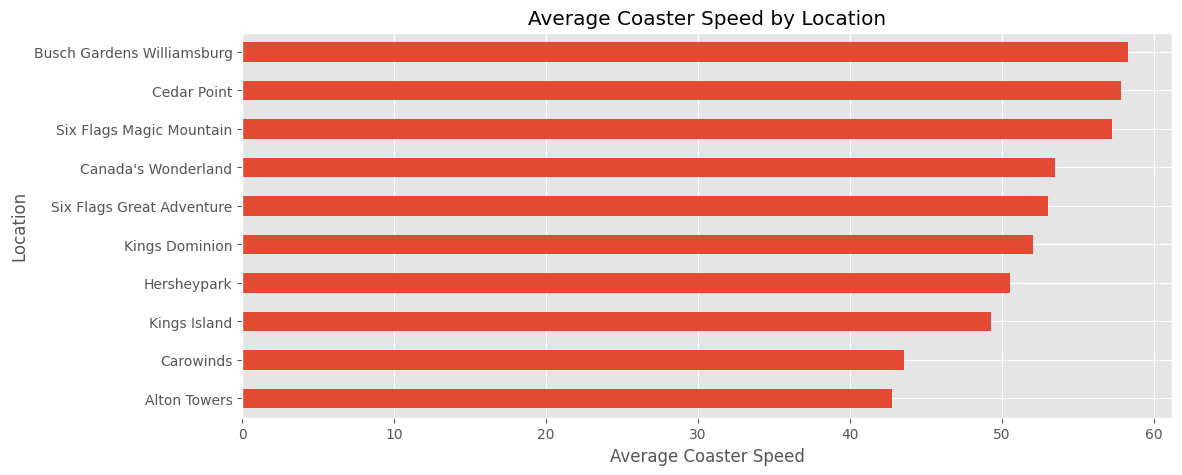

In [29]:
ax = df.query('Location != "Other"') \
  .groupby('Location')['Speed_MPH'] \
  .agg(['mean','count']) \
  .query('count >= 10') \
  .sort_values('mean')['mean'] \
  .plot(kind='barh', figsize=(12, 5), title='Average Coaster Speed by Location')
  
ax.set_xlabel('Average Coaster Speed')

plt.savefig('../reports/figures/Average_Coaster_Speed_by_Location.pdf', format='pdf')